In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
df = pd.read_excel("final_data_damping_sands.xlsx")

In [17]:
df

,strain,damping,RD,conf_pressure,location
0,0.000812,0.872100,30.0,50,BG
1,0.001918,1.309700,30.0,50,BG
2,0.002804,1.308100,30.0,50,BG
3,0.004269,1.775900,30.0,50,BG
4,0.005085,1.600900,30.0,50,BG
...,...,...,...,...,...
1379,0.038216,1.508130,80.0,200,Banglore_B
1380,0.066956,1.963415,80.0,200,Banglore_B
1381,0.076639,3.813008,80.0,200,Banglore_B
1382,0.084784,5.378049,80.0,200,Banglore_B


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   strain         1384 non-null   float64
 1   damping        1384 non-null   float64
 2   RD             1310 non-null   float64
 3   conf_pressure  1384 non-null   int64  
 4   location       1384 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 54.2+ KB


In [19]:
import matplotlib.pyplot as plt


# Get unique combinations of RD, conf_pressure, and location
combinations = df[['RD', 'conf_pressure', 'location']].drop_duplicates()
combinations

,RD,conf_pressure,location
0,30.0,50,BG
28,30.0,100,BG
61,30.0,300,BG
97,50.0,50,BG
127,50.0,100,BG
...,...,...,...
1352,30.0,200,Banglore_B
1361,60.0,200,Banglore_B
1366,80.0,50,Banglore_B
1371,80.0,100,Banglore_B


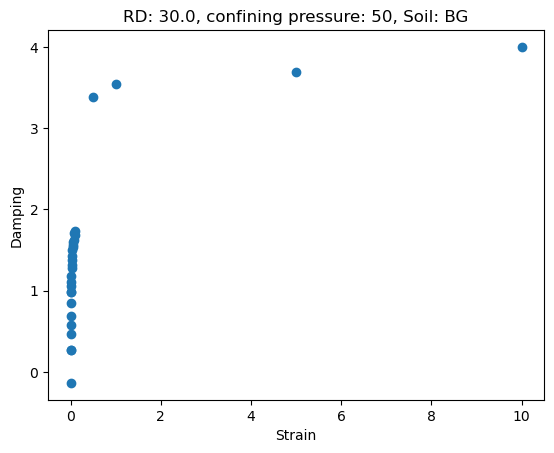

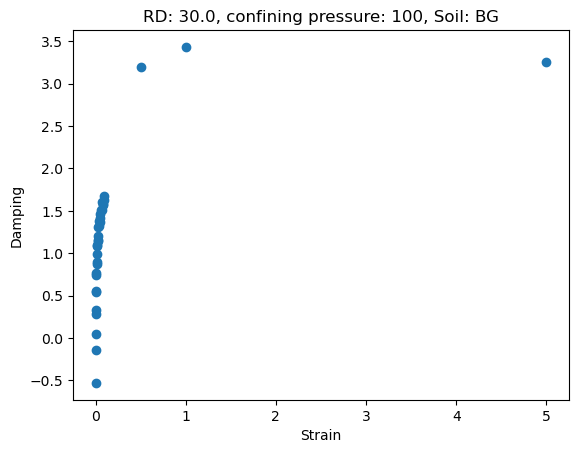

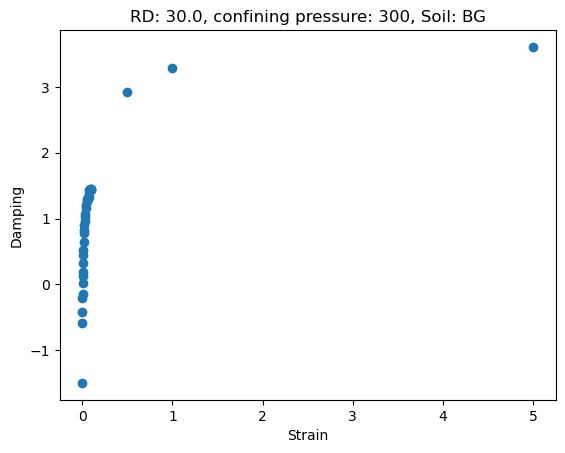

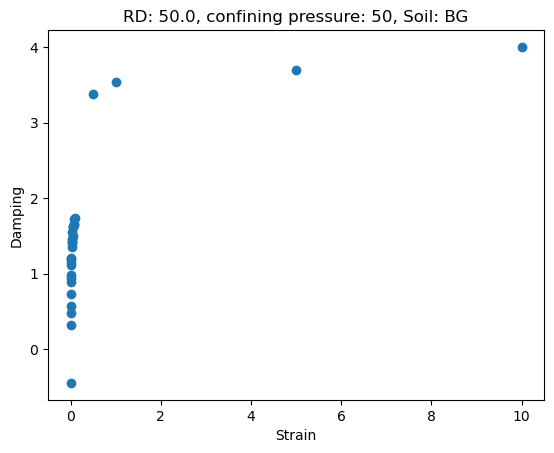

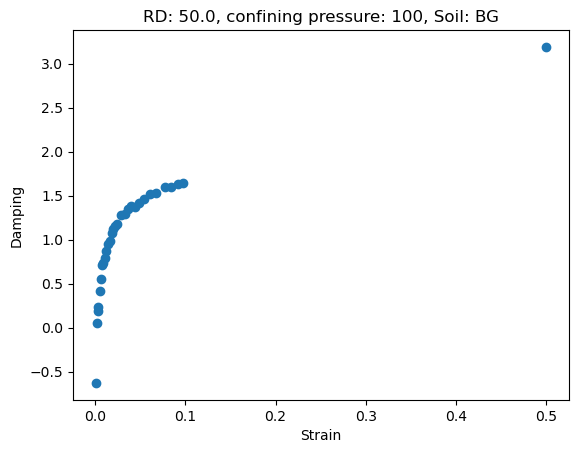

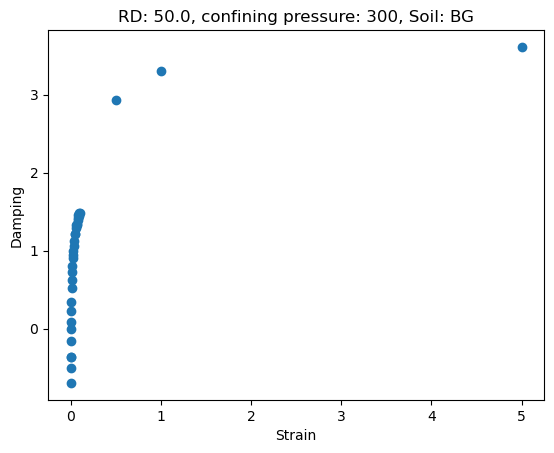

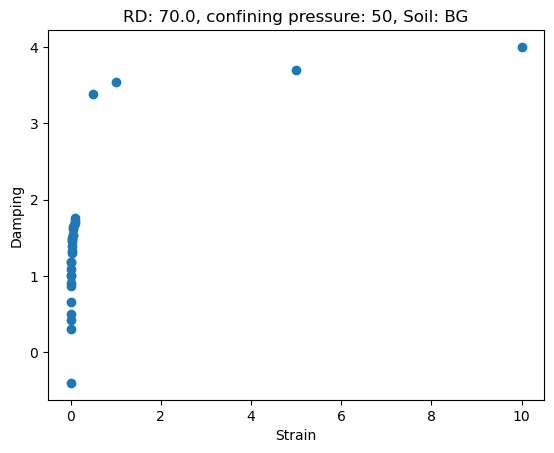

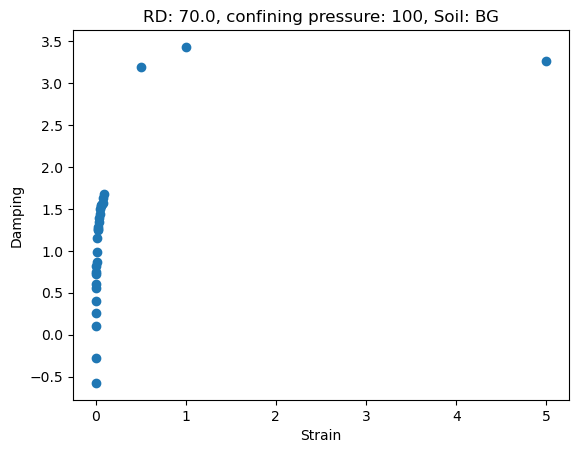

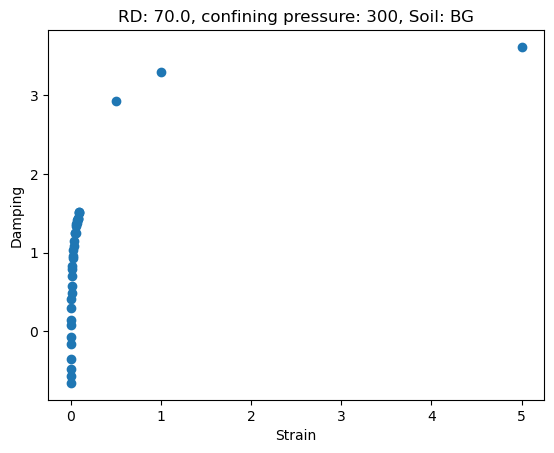

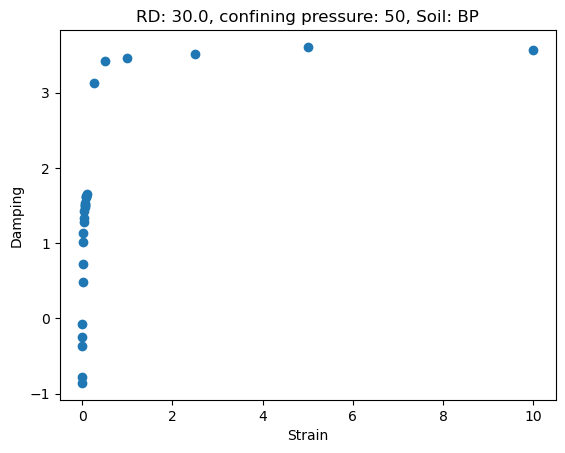

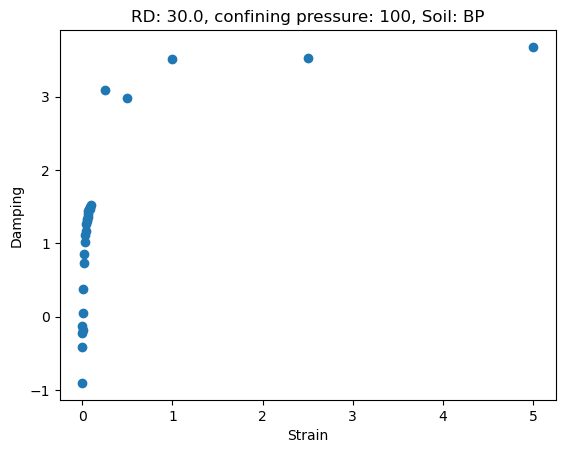

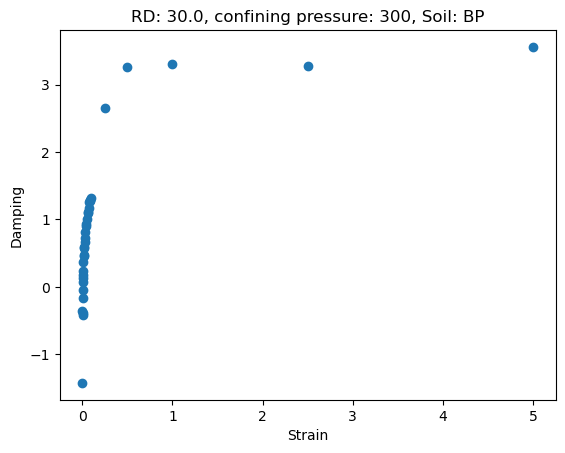

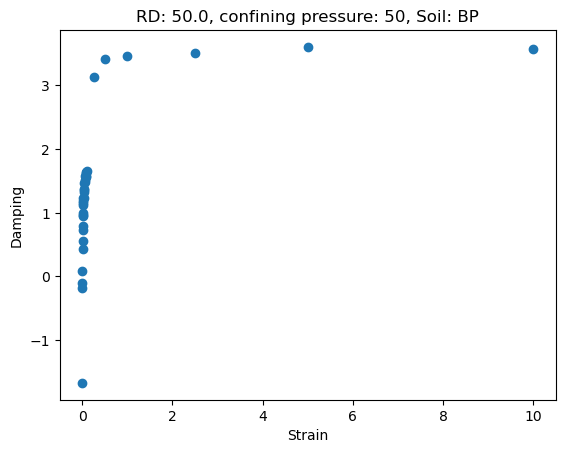

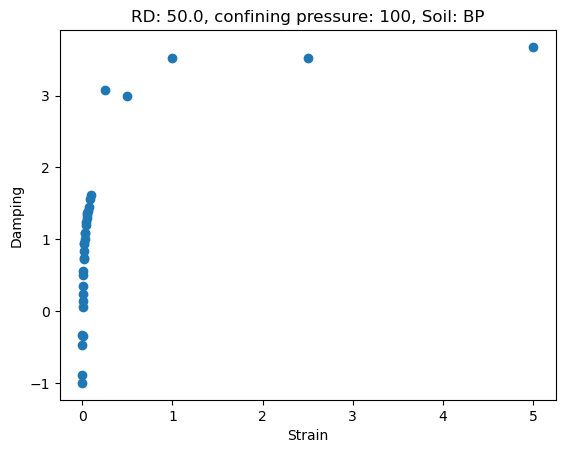

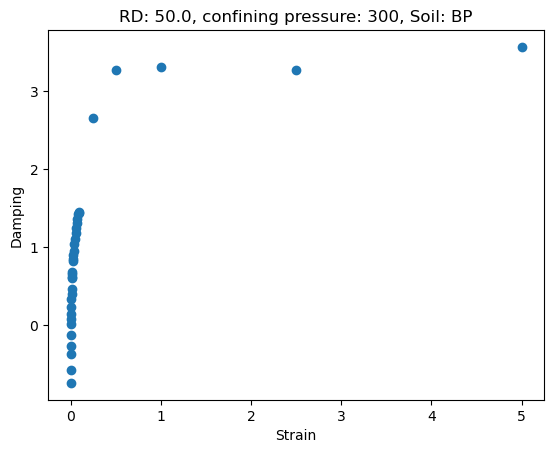

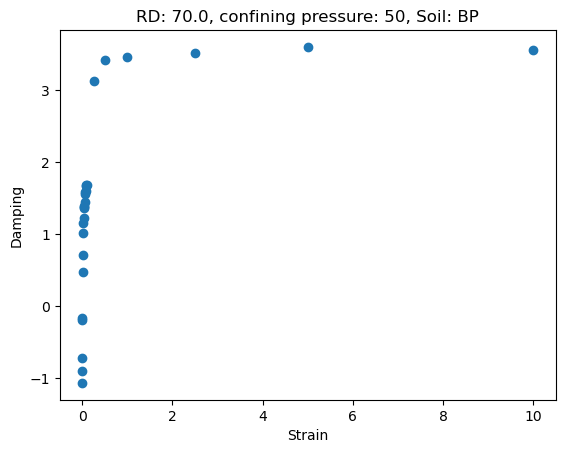

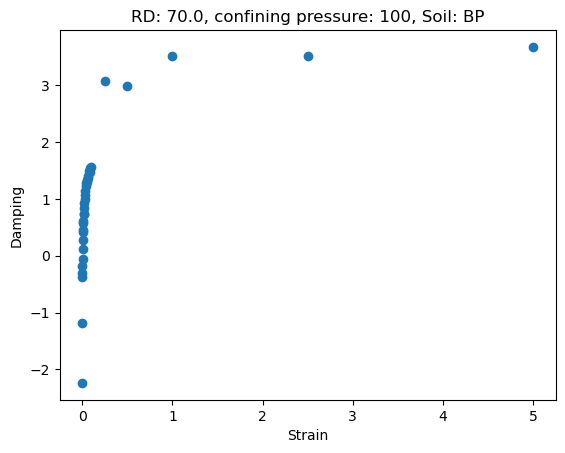

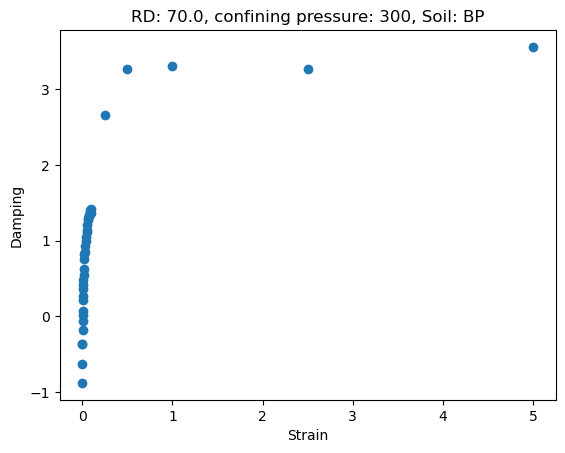

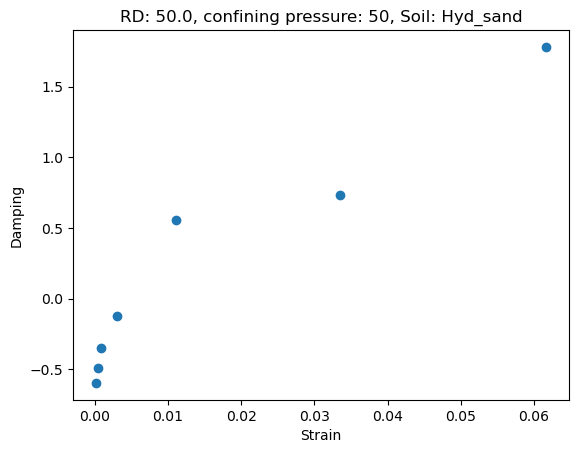

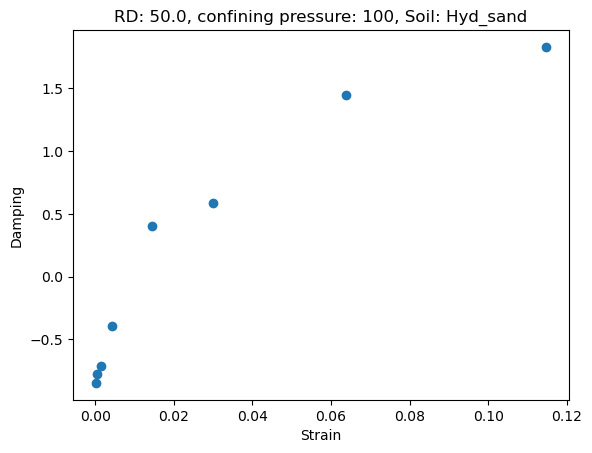

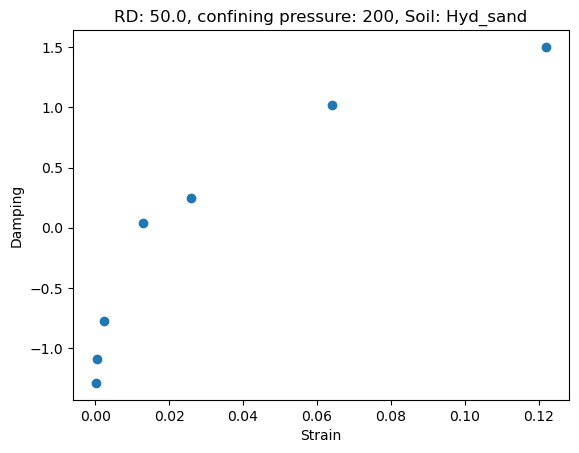

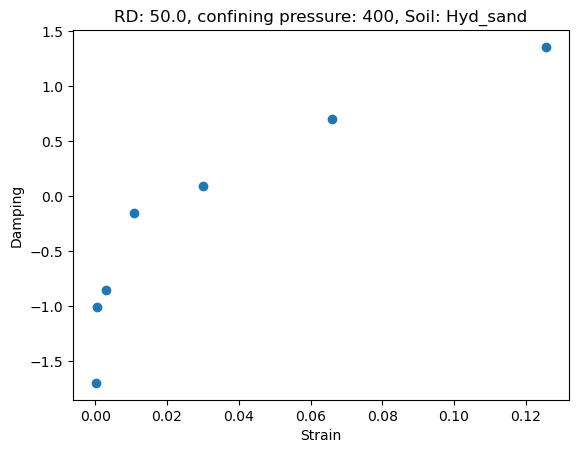

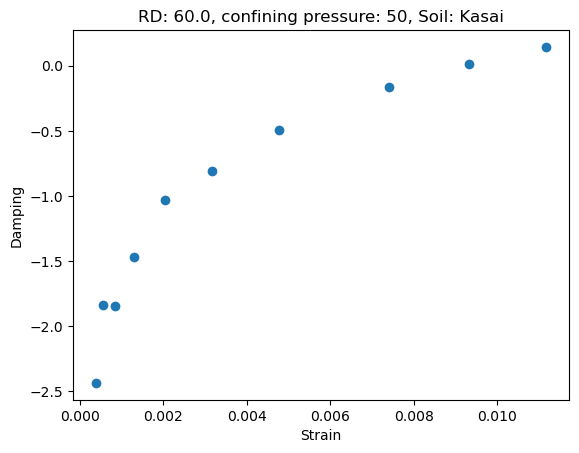

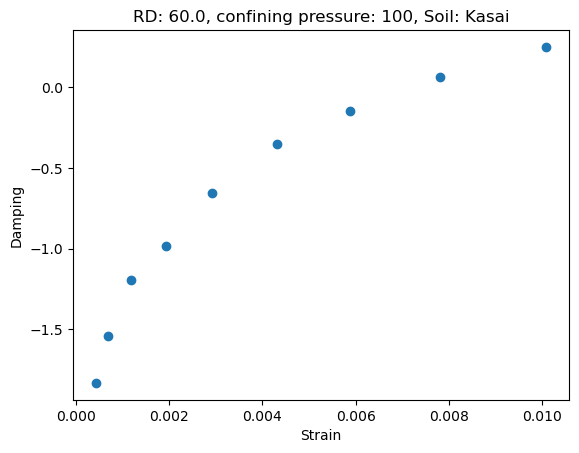

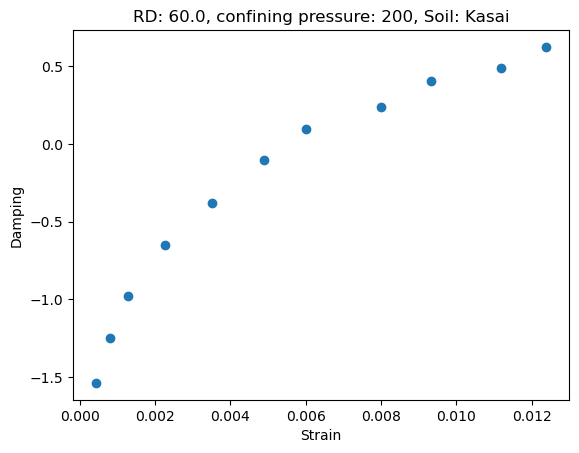

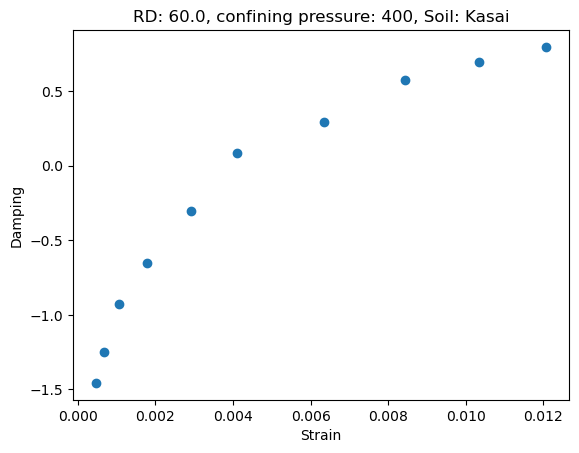

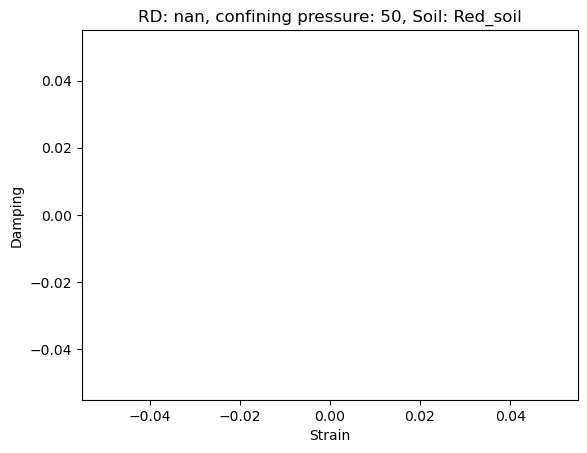

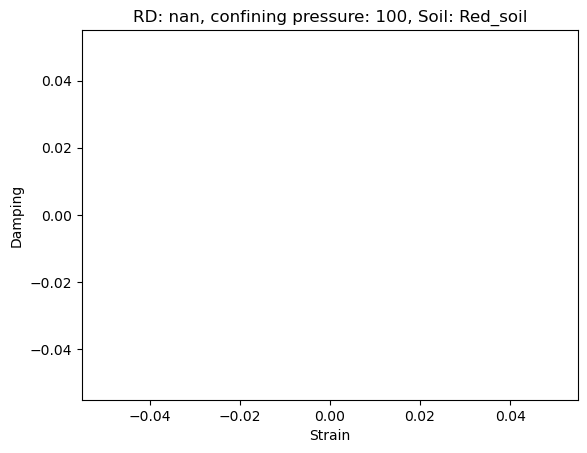

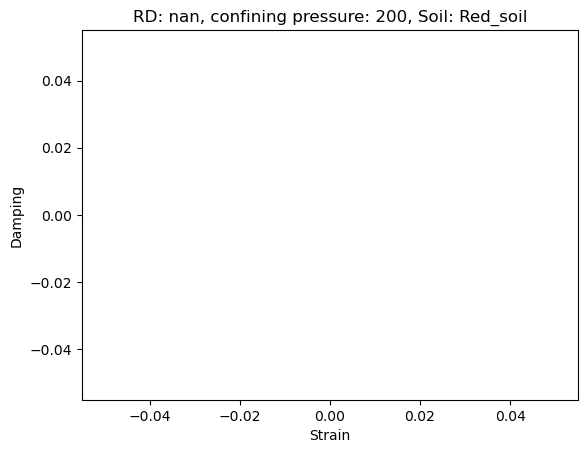

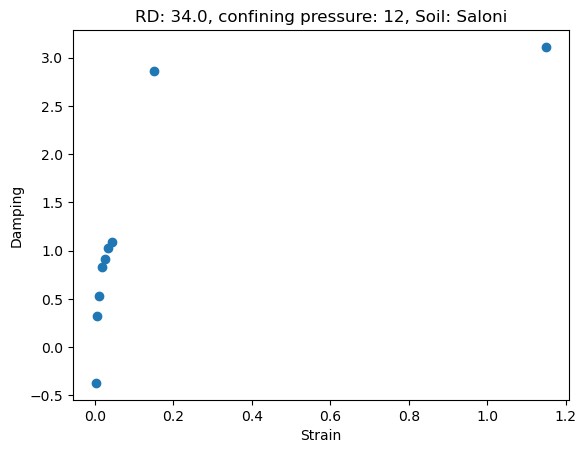

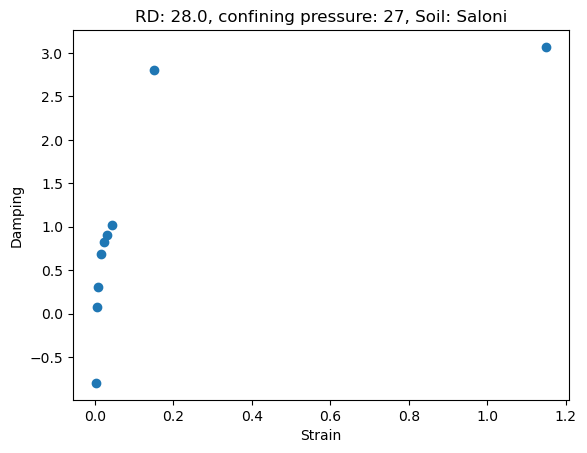

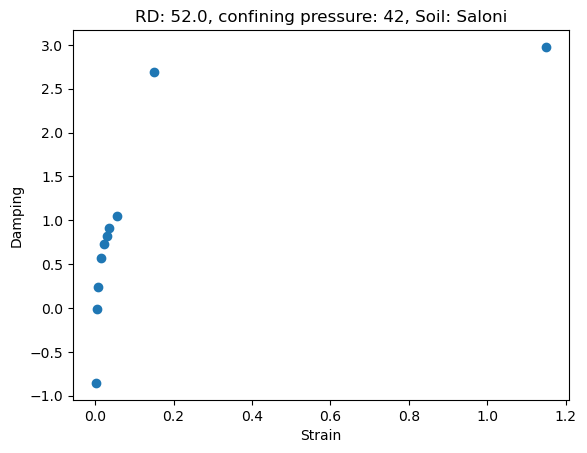

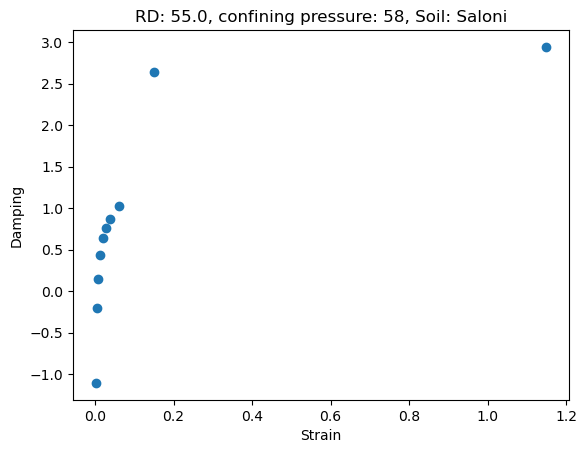

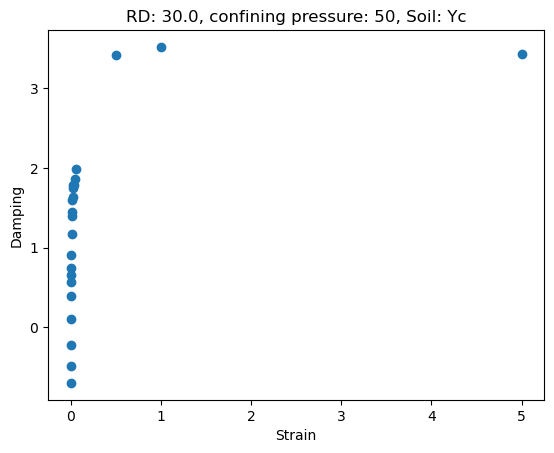

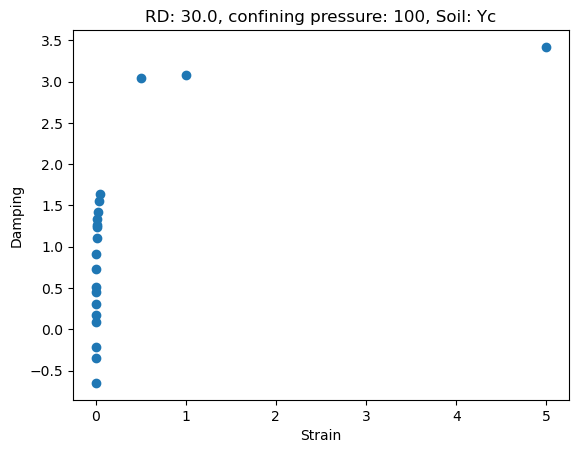

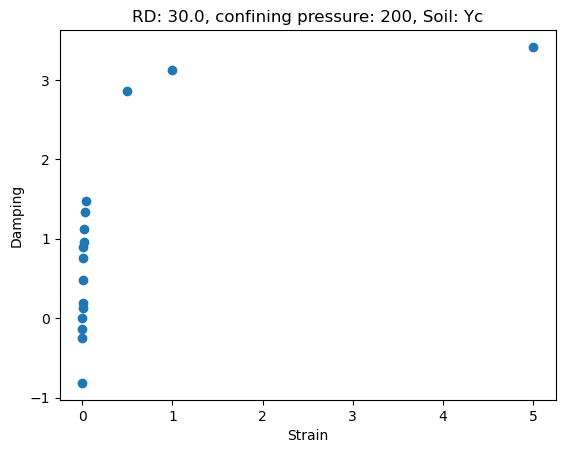

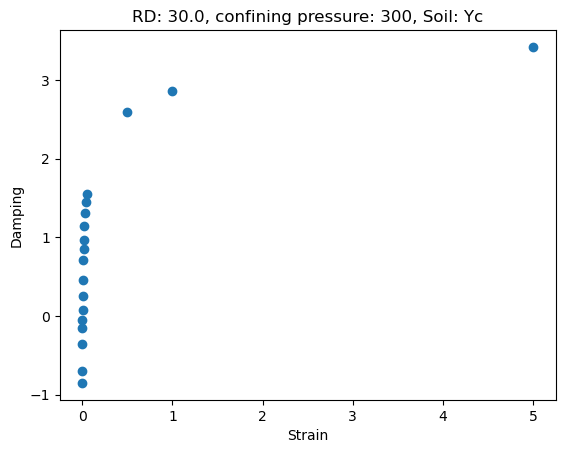

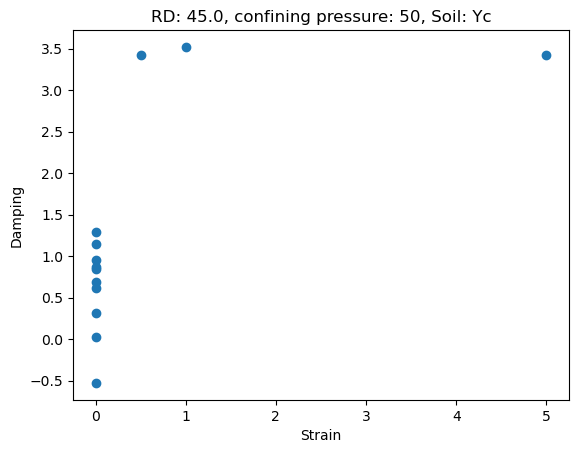

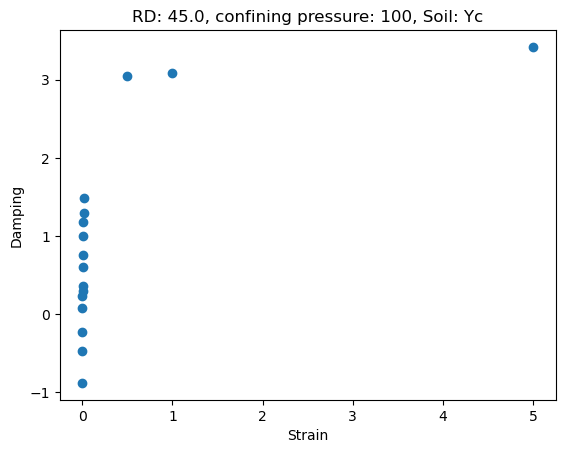

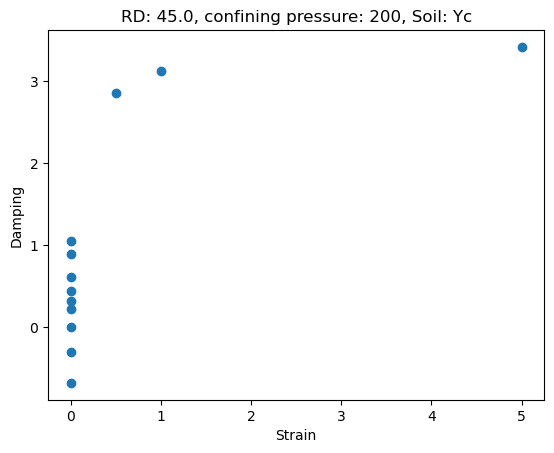

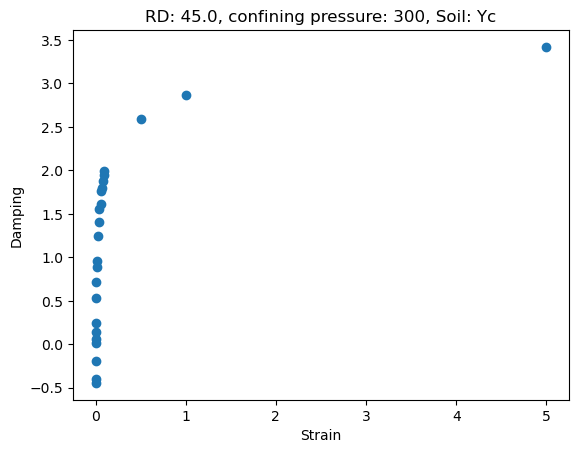

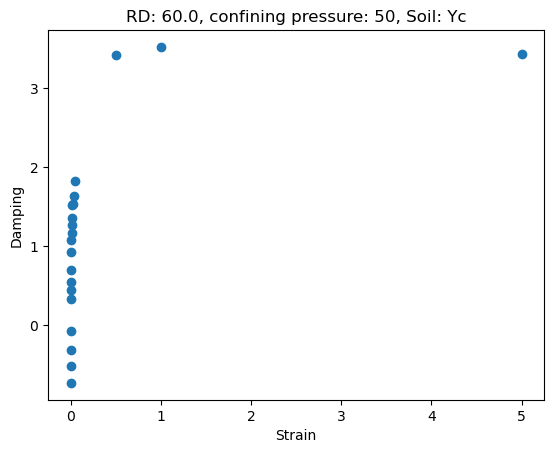

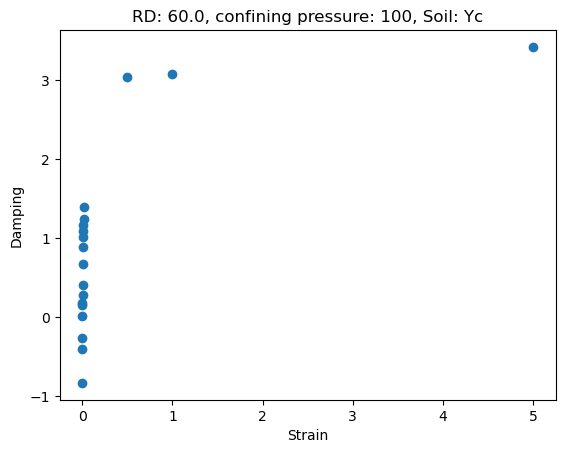

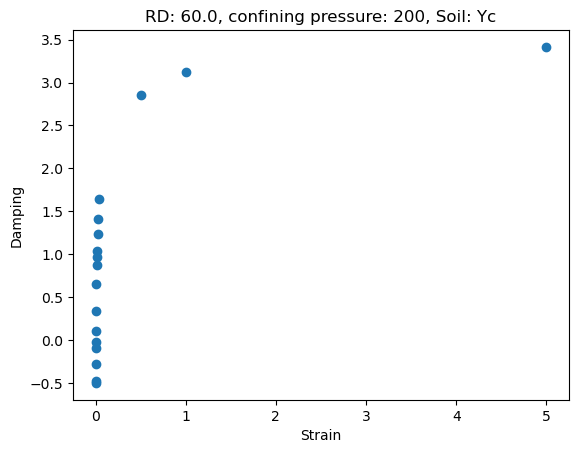

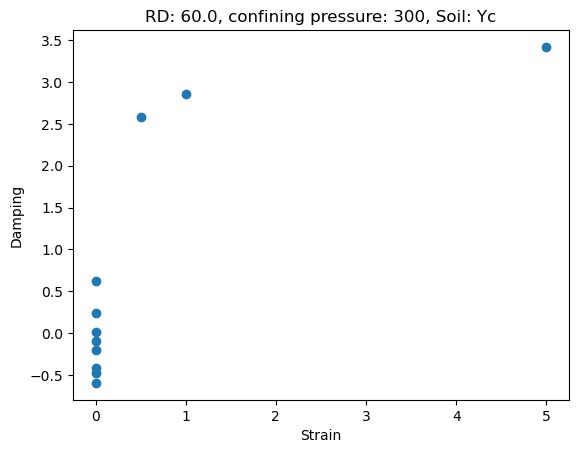

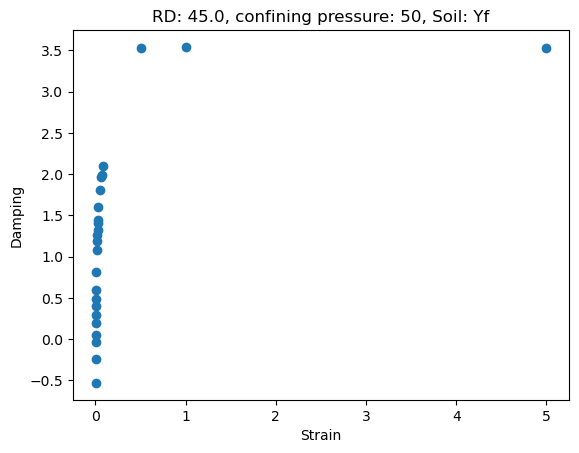

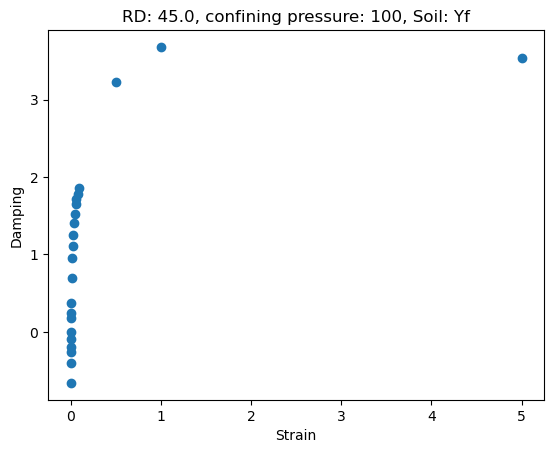

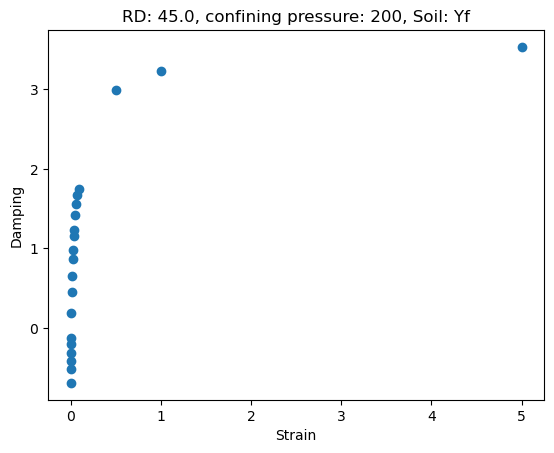

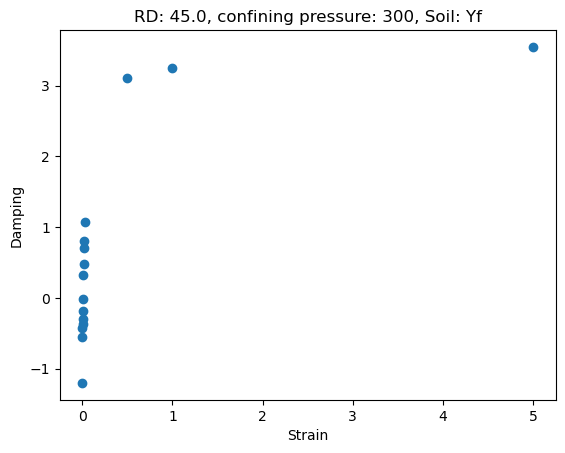

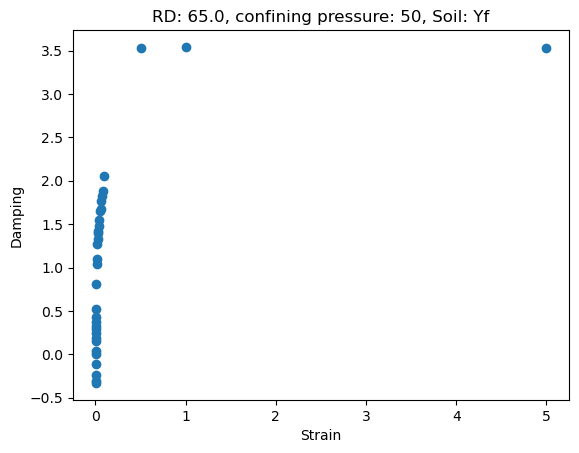

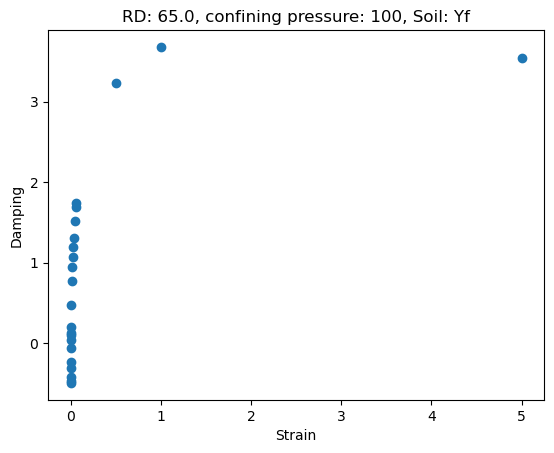

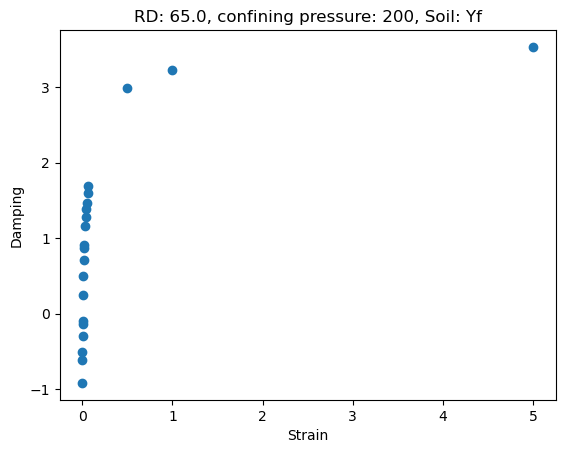

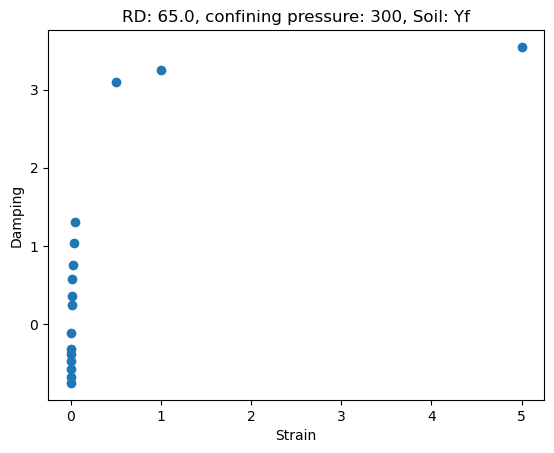

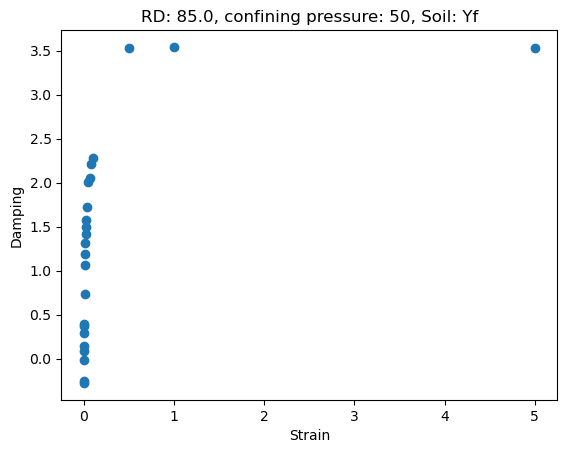

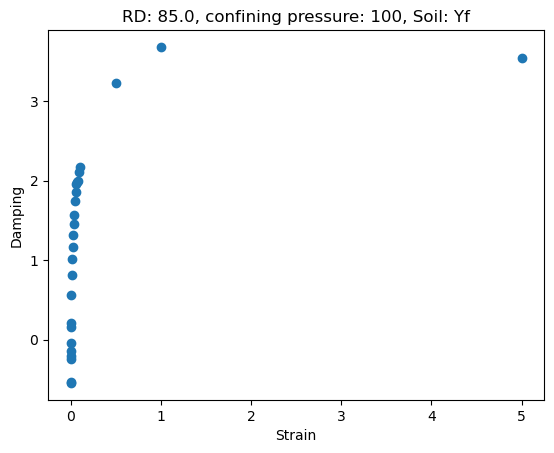

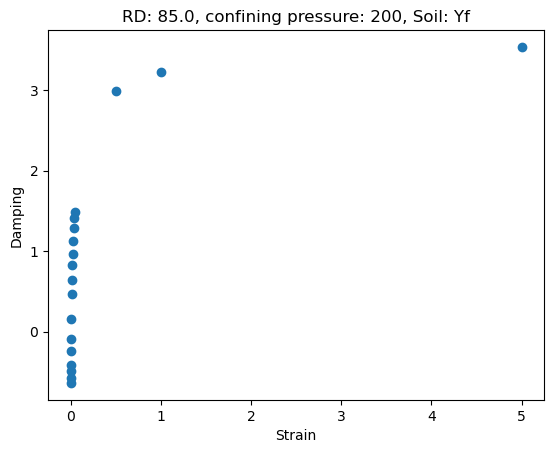

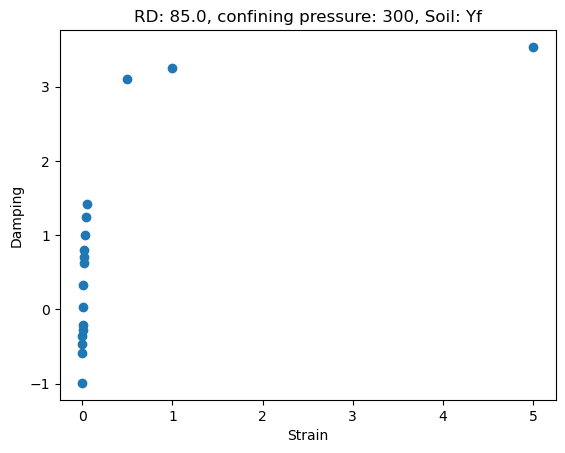

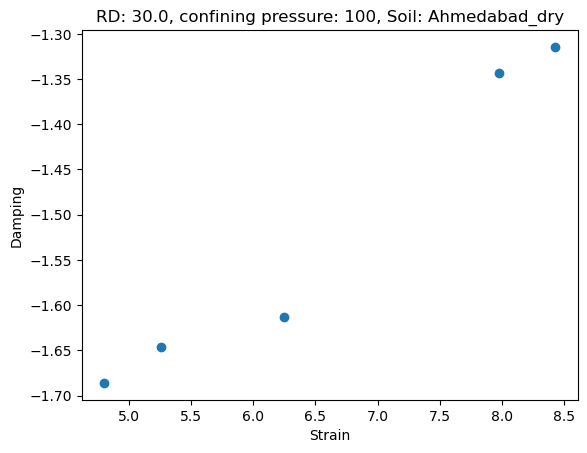

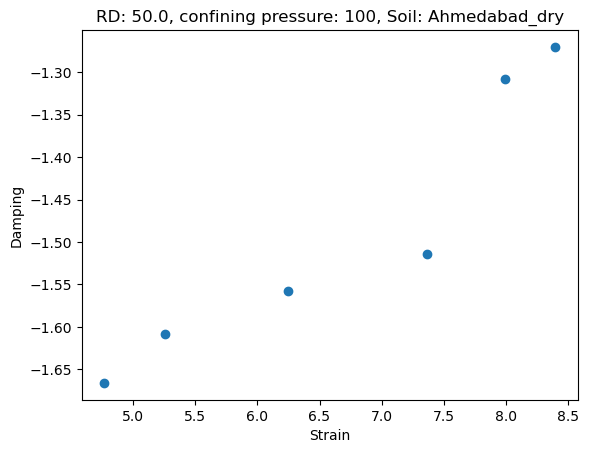

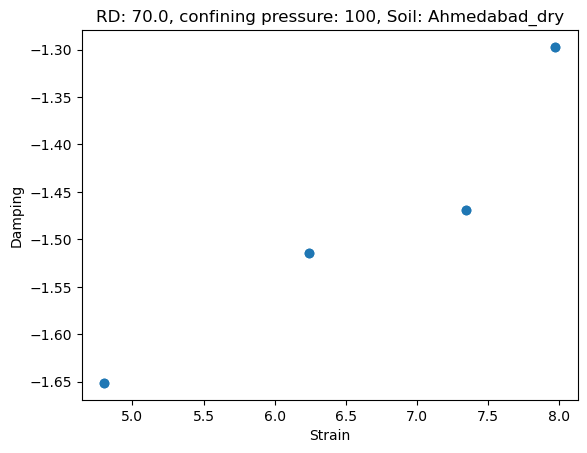

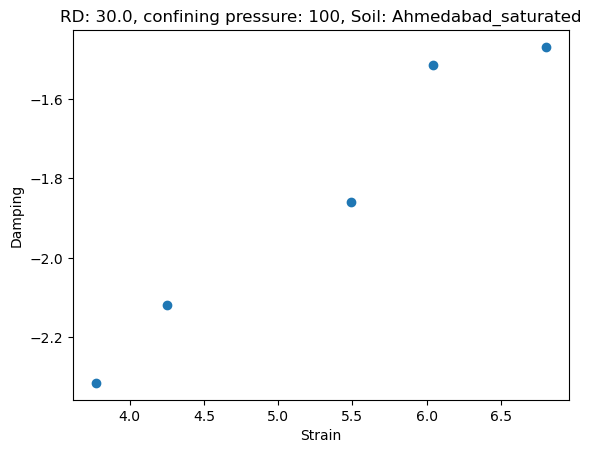

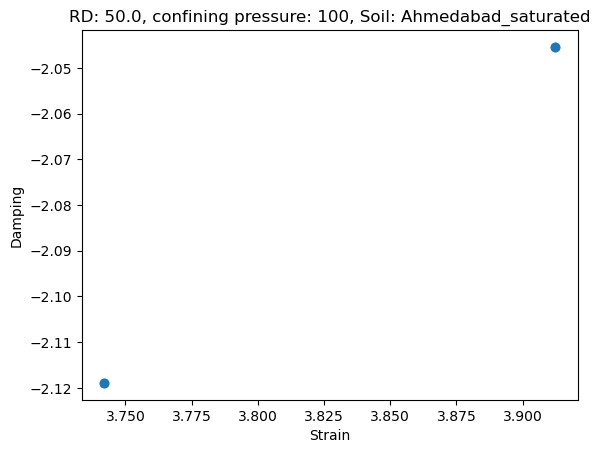

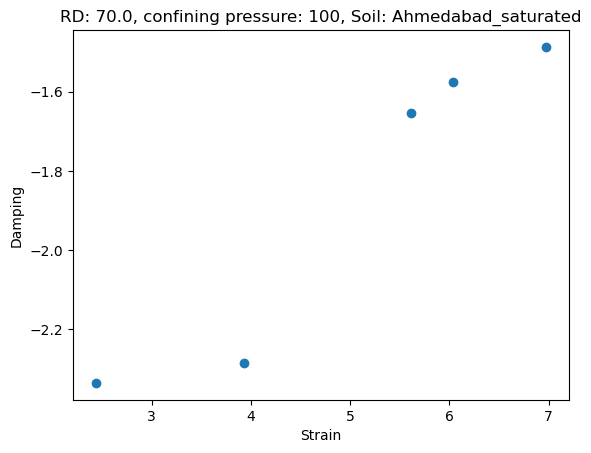

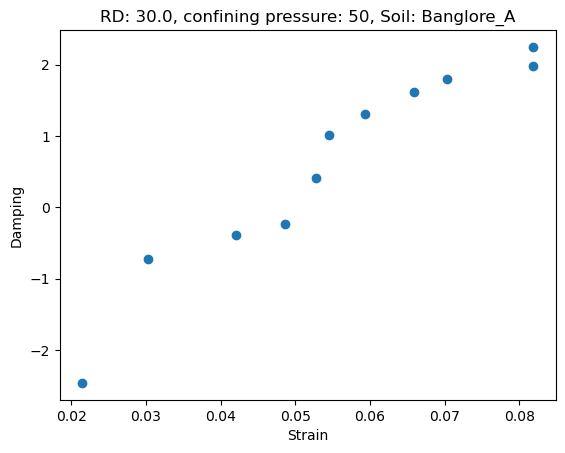

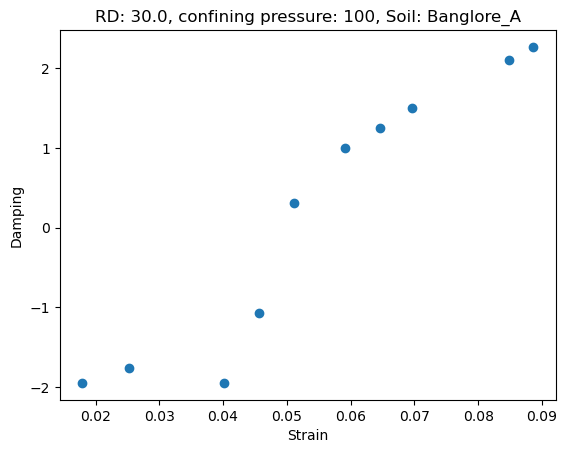

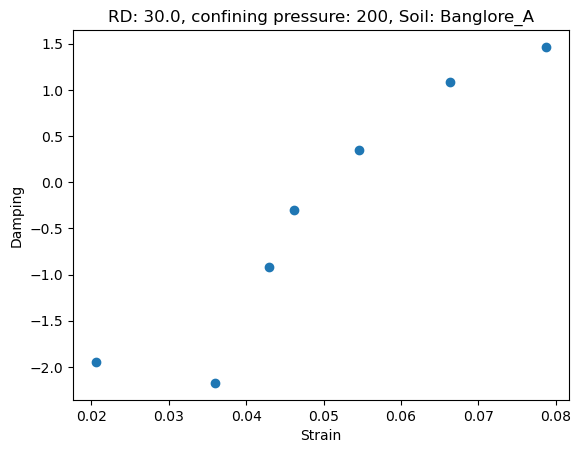

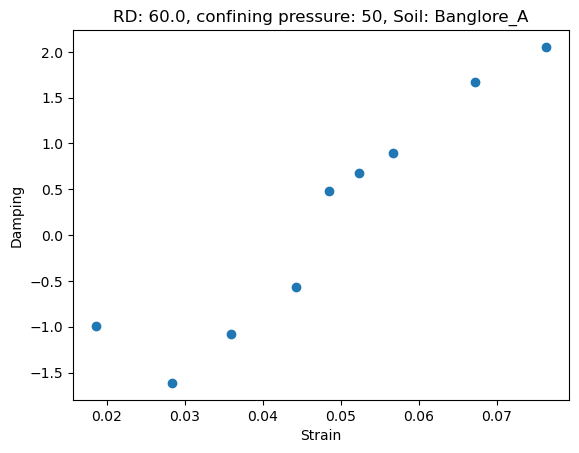

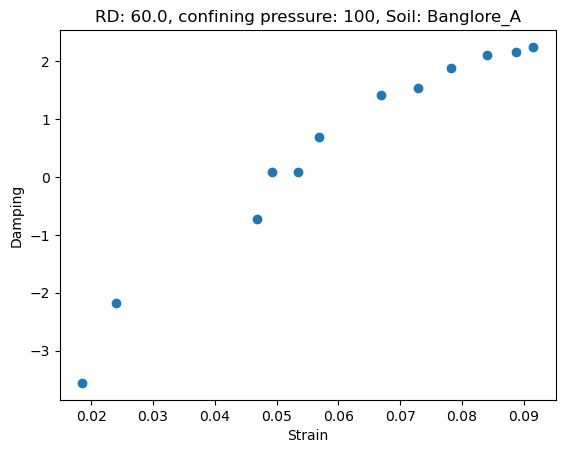

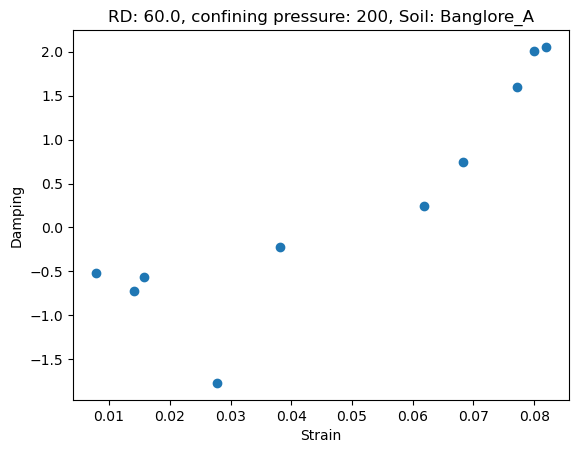

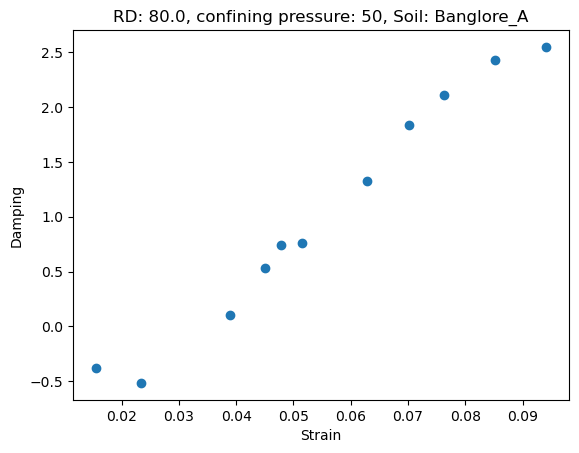

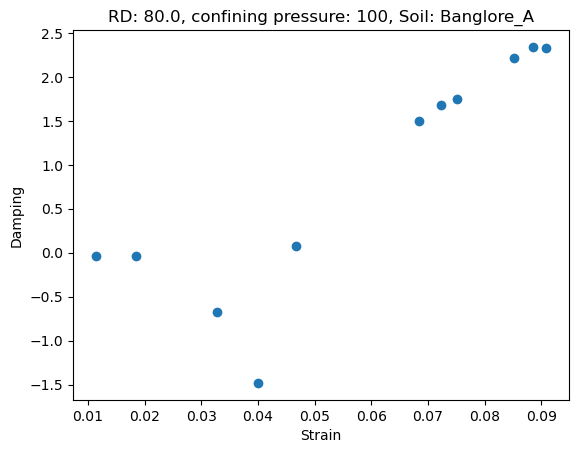

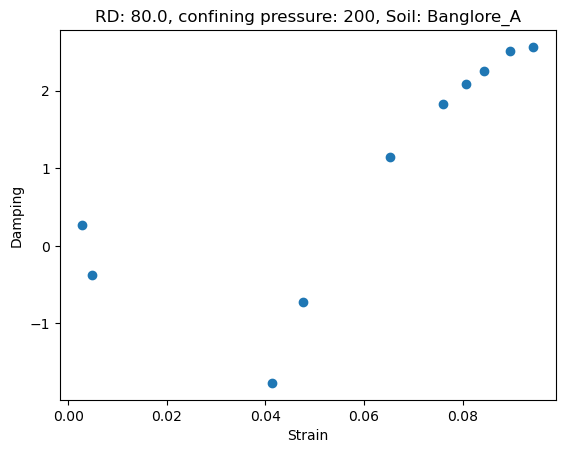

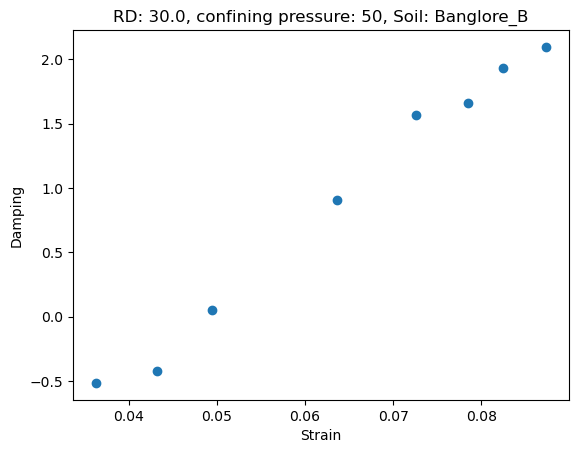

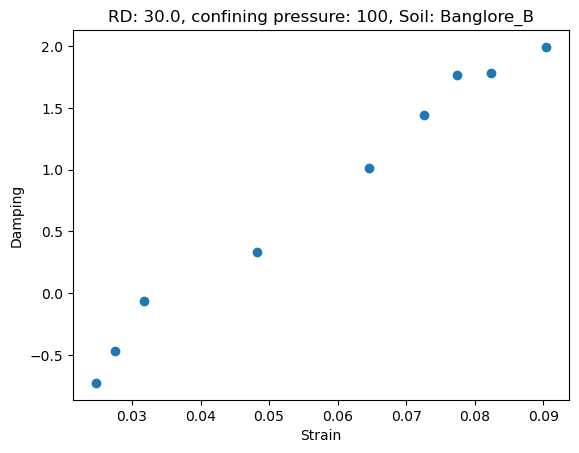

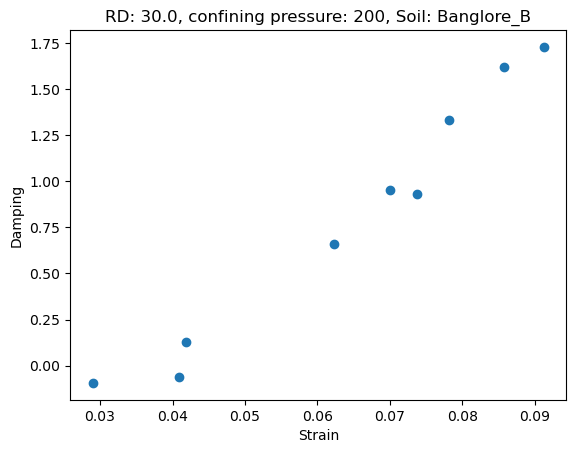

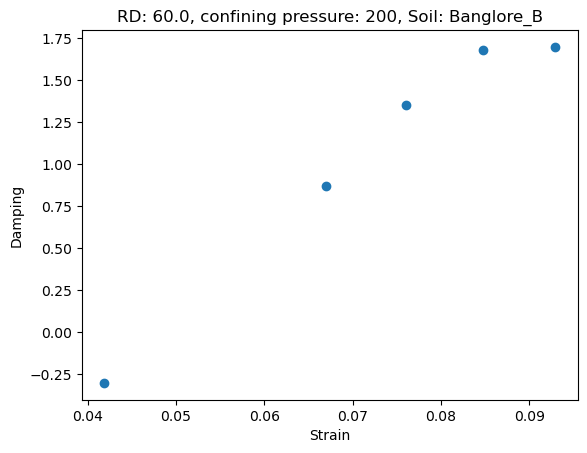

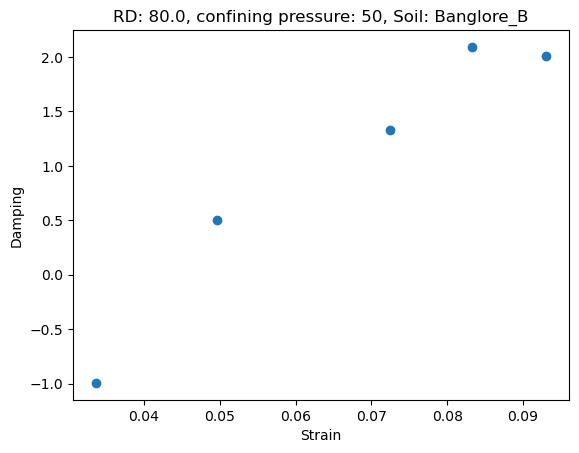

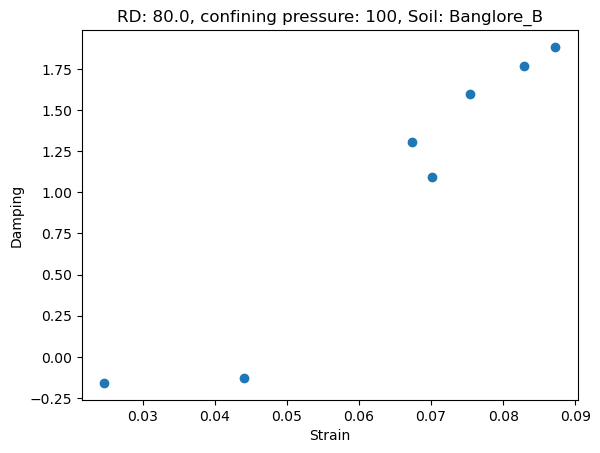

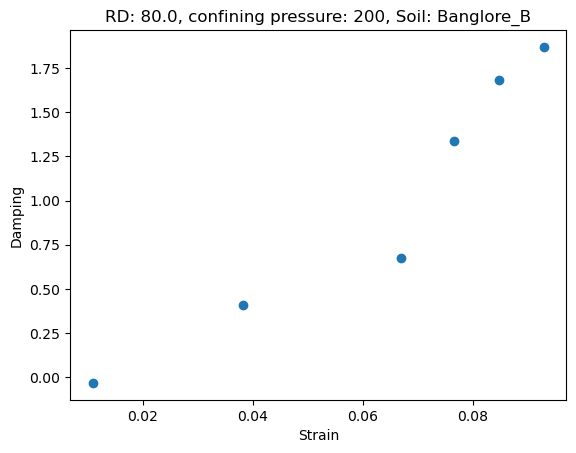

In [192]:
# Loop through each combination and create scatter plots
for index, combo in combinations.iterrows():
    rd, conf_pressure, location = combo

    # Filter data for the current combination
    subset = df[(df['RD'] == rd) & (df['conf_pressure'] == conf_pressure) & (df['location'] == location)]

    #for the current combination
    plt.scatter(subset['strain'], np.log(subset['damping']))


    plt.xlabel('Strain')
    plt.ylabel('Damping')
    plt.title(f'RD: {rd}, confining pressure: {conf_pressure}, Soil: {location}')

    # #saving the plots as image files(if we want to save)
    # plt.savefig(f'scatter_plot_{rd}_{conf_pressure}_{location}.png')

    plt.show()
    plt.close()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   strain         1384 non-null   float64
 1   damping        1384 non-null   float64
 2   RD             1310 non-null   float64
 3   conf_pressure  1384 non-null   int64  
 4   location       1384 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 54.2+ KB


In [21]:
df.isnull().sum()

strain            0
damping           0
RD               74
conf_pressure     0
location          0
dtype: int64

In [22]:
# Drop rows where 'RD' is 'None'
df = df.dropna()
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [23]:
df

,strain,damping,RD,conf_pressure,location
0,0.000812,0.872100,30.0,50,BG
1,0.001918,1.309700,30.0,50,BG
2,0.002804,1.308100,30.0,50,BG
3,0.004269,1.775900,30.0,50,BG
4,0.005085,1.600900,30.0,50,BG
...,...,...,...,...,...
1305,0.038216,1.508130,80.0,200,Banglore_B
1306,0.066956,1.963415,80.0,200,Banglore_B
1307,0.076639,3.813008,80.0,200,Banglore_B
1308,0.084784,5.378049,80.0,200,Banglore_B


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   strain         1310 non-null   float64
 1   damping        1310 non-null   float64
 2   RD             1310 non-null   float64
 3   conf_pressure  1310 non-null   int64  
 4   location       1310 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 51.3+ KB


In [25]:
# Get unique combinations of RD, conf_pressure, and location
locations = df[['location']].drop_duplicates()
locations

,location
0,BG
285,BP
570,Hyd_sand
599,Kasai
639,Saloni
677,Yc
883,Yf
1137,Ahmedabad_dry
1156,Ahmedabad_saturated
1170,Banglore_A


In [26]:
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                 strain   damping        RD  conf_pressure
strain         1.000000  0.536564 -0.015156      -0.067426
damping        0.536564  1.000000  0.000753      -0.070497
RD            -0.015156  0.000753  1.000000       0.005523
conf_pressure -0.067426 -0.070497  0.005523       1.000000


C:\Users\manoj\AppData\Local\Temp\ipykernel_3884\3231934710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


4


<Axes: >

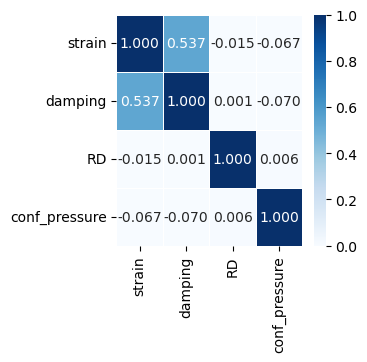

In [27]:
numerical_ = [i for i in df.columns if df[i].dtype in ['int64','float64']]
print(len(numerical_))
plt.figure(figsize=(3,3))
correlation = df[numerical_].corr()

sns.heatmap(correlation, annot=True, fmt=".3f", cmap='Blues', linewidths=0.5, vmin=0, vmax=1)

In [28]:
#OHE
df = pd.get_dummies(df, columns=['location'], prefix="")


In [30]:
df.columns = df.columns.str.lstrip('_')
df.head()

,strain,damping,RD,conf_pressure,Ahmedabad_dry,Ahmedabad_saturated,BG,BP,Banglore_A,Banglore_B,Hyd_sand,Kasai,Saloni,Yc,Yf
0,0.000812,0.8721,30.0,50,0,0,1,0,0,0,0,0,0,0,0
1,0.001918,1.3097,30.0,50,0,0,1,0,0,0,0,0,0,0,0
2,0.002804,1.3081,30.0,50,0,0,1,0,0,0,0,0,0,0,0
3,0.004269,1.7759,30.0,50,0,0,1,0,0,0,0,0,0,0,0
4,0.005085,1.6009,30.0,50,0,0,1,0,0,0,0,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   strain               1310 non-null   float64
 1   damping              1310 non-null   float64
 2   RD                   1310 non-null   float64
 3   conf_pressure        1310 non-null   int64  
 4   Ahmedabad_dry        1310 non-null   uint8  
 5   Ahmedabad_saturated  1310 non-null   uint8  
 6   BG                   1310 non-null   uint8  
 7   BP                   1310 non-null   uint8  
 8   Banglore_A           1310 non-null   uint8  
 9   Banglore_B           1310 non-null   uint8  
 10  Hyd_sand             1310 non-null   uint8  
 11  Kasai                1310 non-null   uint8  
 12  Saloni               1310 non-null   uint8  
 13  Yc                   1310 non-null   uint8  
 14  Yf                   1310 non-null   uint8  
dtypes: float64(3), int64(1), uint8(11)
mem

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the 'RD' and 'conf_pressure' columns
df[['RD', 'conf_pressure']] = scaler.fit_transform(df[['RD', 'conf_pressure']])

In [34]:
df.describe()

,strain,damping,RD,conf_pressure,Ahmedabad_dry,Ahmedabad_saturated,BG,BP,Banglore_A,Banglore_B,Hyd_sand,Kasai,Saloni,Yc,Yf
count,1310.000000,1310.000000,1.310000e+03,1.310000e+03,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,0.444449,5.687928,-5.423990e-17,-1.084798e-16,0.014504,0.010687,0.217557,0.217557,0.069466,0.037405,0.022137,0.030534,0.029008,0.157252,0.193893
std,1.432276,9.048786,1.000382e+00,1.000382e+00,0.119601,0.102863,0.412742,0.412742,0.254341,0.189824,0.147187,0.172118,0.167892,0.364177,0.395497
min,0.000092,0.028455,-1.441054e+00,-1.332172e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005463,1.076600,-1.325445e+00,-9.601999e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.026375,2.587415,-1.693540e-01,-4.707633e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.074143,4.561025,9.867365e-01,5.081099e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,54.630000,1.853804e+00,2.465856e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.shape

(1310, 15)

In [36]:
y = df['damping']
x = df.drop('damping' , axis=1)

In [37]:
x.shape

(1310, 14)

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)


# Print the sizes of the resulting sets
print("x_train shape:", x_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

x_train shape: (917, 14)
x_valid shape: (393, 14)
y_train shape: (917,)
y_valid shape: (393,)


In [39]:
x_valid.head(10)

,strain,RD,conf_pressure,Ahmedabad_dry,Ahmedabad_saturated,BG,BP,Banglore_A,Banglore_B,Hyd_sand,Kasai,Saloni,Yc,Yf
701,0.001510,-1.325445,-0.470763,0,0,0,0,0,0,0,0,0,1,0
994,1.000000,0.697714,-0.960200,0,0,0,0,0,0,0,0,0,0,1
350,0.018039,-1.325445,1.486983,0,0,0,1,0,0,0,0,0,0,0
986,0.037100,0.697714,-0.960200,0,0,0,0,0,0,0,0,0,0,1
409,0.002501,-0.169354,-0.470763,0,0,0,1,0,0,0,0,0,0,0
917,0.019040,-0.458377,-0.470763,0,0,0,0,0,0,0,0,0,0,1
905,1.000000,-0.458377,-0.960200,0,0,0,0,0,0,0,0,0,0,1
1117,0.500000,1.853804,0.508110,0,0,0,0,0,0,0,0,0,0,1
1168,6.040895,0.986737,-0.470763,0,1,0,0,0,0,0,0,0,0,0
344,0.007085,-1.325445,1.486983,0,0,0,1,0,0,0,0,0,0,0


In [40]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [41]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
#lightgbm
import lightgbm as lgb


# Create an instance of each regression model
random_state = 42

ridge_reg = Ridge(random_state=random_state)
lasso_reg = Lasso(random_state=random_state)
elastic_net_reg = ElasticNet(random_state=random_state)
decision_tree_reg = DecisionTreeRegressor(random_state=random_state)
random_forest_reg = RandomForestRegressor(random_state=random_state)
xgb_model =XGBRegressor(random_state=42)
svr_reg = SVR()
neural_network_reg = MLPRegressor(random_state=random_state)
lgb_reg = lgb.LGBMRegressor(random_state=42)

# Fit the regression models to your data
ridge_reg.fit(x_train, y_train)
lasso_reg.fit(x_train, y_train)
elastic_net_reg.fit(x_train, y_train)
decision_tree_reg.fit(x_train, y_train)
random_forest_reg.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)
svr_reg.fit(x_train, y_train)
neural_network_reg.fit(x_train, y_train)
lgb_reg.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


LGBMRegressor(random_state=42)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ridge Regression
ridge_predictions = ridge_reg.predict(x_valid)
ridge_mae = mean_absolute_error(y_valid, ridge_predictions)
ridge_mse = mean_squared_error(y_valid, ridge_predictions)
ridge_rmse =  np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_valid, ridge_predictions)


new_row = {"Model": "Ridge Regression","MAE": ridge_mae, "MSE": ridge_mse, "RMSE": ridge_rmse, "R2 Score": ridge_r2}
models = models.append(new_row, ignore_index=True)


# Lasso Regression
lasso_predictions = lasso_reg.predict(x_valid)
lasso_mae = mean_absolute_error(y_valid, lasso_predictions)
lasso_mse = mean_squared_error(y_valid, lasso_predictions)
lasso_rmse =  np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_valid, lasso_predictions)


new_row = {"Model": "Lasso Regression","MAE": lasso_mae, "MSE": lasso_mse, "RMSE": lasso_rmse, "R2 Score": lasso_r2}
models = models.append(new_row, ignore_index=True)


# ElasticNet Regression
elastic_net_predictions = elastic_net_reg.predict(x_valid)
elastic_net_mae = mean_absolute_error(y_valid, elastic_net_predictions)
elastic_net_mse = mean_squared_error(y_valid, elastic_net_predictions)
elastic_net_rmse =  np.sqrt(elastic_net_mse)
elastic_net_r2 = r2_score(y_valid, elastic_net_predictions)

new_row = {"Model": "ElasticNet Regression","MAE": elastic_net_mae, "MSE": elastic_net_mse, "RMSE": elastic_net_rmse, "R2 Score": elastic_net_r2}
models = models.append(new_row, ignore_index=True)



# Decision Tree Regression
decision_tree_predictions = decision_tree_reg.predict(x_valid)
decision_tree_mae = mean_absolute_error(y_valid, decision_tree_predictions)
decision_tree_mse = mean_squared_error(y_valid, decision_tree_predictions)
decision_tree_rmse =  np.sqrt(decision_tree_mse)
decision_tree_r2 = r2_score(y_valid, decision_tree_predictions)


new_row = {"Model": "Decision Tree Regression","MAE": decision_tree_mae, "MSE": decision_tree_mse, "RMSE": decision_tree_rmse, "R2 Score": decision_tree_r2}
models = models.append(new_row, ignore_index=True)


# Random Forest Regression
random_forest_predictions = random_forest_reg.predict(x_valid)
random_forest_mae = mean_absolute_error(y_valid, random_forest_predictions)
random_forest_mse = mean_squared_error(y_valid, random_forest_predictions)
random_forest_rmse =  np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_valid, random_forest_predictions)


new_row = {"Model": "Random Forest Regression","MAE": random_forest_mae, "MSE": random_forest_mse, "RMSE": random_forest_rmse, "R2 Score": random_forest_r2}
models = models.append(new_row, ignore_index=True)

# Gradient Boosting Regression (XGBoost)
xgb_predictions = xgb_model.predict(x_valid)
xgb_mae = mean_absolute_error(y_valid, xgb_predictions)
xgb_mse = mean_squared_error(y_valid, xgb_predictions)
xgb_rmse =  np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_valid, xgb_predictions)


new_row = {"Model": "Gradient Boosting Regression","MAE":xgb_mae, "MSE": xgb_mse, "RMSE": xgb_rmse, "R2 Score": xgb_r2}
models = models.append(new_row, ignore_index=True)

# Support Vector Regression (SVR)
svr_predictions = svr_reg.predict(x_valid)
svr_mae = mean_absolute_error(y_valid, svr_predictions)
svr_mse = mean_squared_error(y_valid, svr_predictions)
svr_rmse =  np.sqrt(svr_mse)
svr_r2 = r2_score(y_valid, svr_predictions)


new_row = {"Model": "Support Vector Regression","MAE":svr_mae, "MSE": svr_mse, "RMSE": svr_rmse, "R2 Score": svr_r2}
models = models.append(new_row, ignore_index=True)


# Neural Network Regression
neural_network_predictions = neural_network_reg.predict(x_valid)
neural_network_mae = mean_absolute_error(y_valid, neural_network_predictions)
neural_network_mse = mean_squared_error(y_valid, neural_network_predictions)
neural_network_rmse =  np.sqrt(neural_network_mse)
neural_network_r2 = r2_score(y_valid , neural_network_predictions)


new_row = {"Model": "Neural Network Regression","MAE": neural_network_mae, "MSE": neural_network_mse, "RMSE": neural_network_rmse, "R2 Score": neural_network_r2}
models = models.append(new_row, ignore_index=True)

# LightGBM Regression
predictions_lgb = lgb_reg.predict(x_valid)
lgbm_mae = mean_absolute_error(y_valid, predictions_lgb)
lgbm_mse = mean_squared_error(y_valid, predictions_lgb)
lgbm_rmse =  np.sqrt(lgbm_mse)
lgbm_r2 = r2_score(y_valid, predictions_lgb)

new_row = {"Model": "LightGBM Regression","MAE": lgbm_mae, "MSE": lgbm_mse, "RMSE": lgbm_rmse, "R2 Score": lgbm_r2}
models = models.append(new_row, ignore_index=True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_3884\146386324.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)
C:\Users\manoj\AppData\Local\Temp\ipykernel_3884\146386324.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)
C:\Users\manoj\AppData\Local\Temp\ipykernel_3884\146386324.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)
C:\Users\manoj\AppData\Local\Temp\ipykernel_3884\146386324.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_inde

In [43]:
models.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
5,Gradient Boosting Regression,0.389904,0.892689,0.944822,0.987045
4,Random Forest Regression,0.449514,0.928934,0.963812,0.986519
3,Decision Tree Regression,0.504551,1.685843,1.298400,0.975535
8,LightGBM Regression,0.580497,1.880588,1.371345,0.972709
7,Neural Network Regression,1.599666,8.214434,2.866083,0.880791
0,Ridge Regression,3.608595,37.936672,6.159275,0.449459
6,Support Vector Regression,3.173004,38.385733,6.195622,0.442942
1,Lasso Regression,4.304431,55.463485,7.447381,0.195108
2,ElasticNet Regression,4.415174,55.798585,7.469845,0.190245


In [44]:
#BLENDING

In [45]:
def blend_models_predict(x):
  return(
      (0.25* random_forest_reg.predict(x)) +
      (0.25 *xgb_model.predict(x)) +
      (0.25 *lgb_reg.predict(x)) +
      (0.25*decision_tree_reg.predict(x))
      )

In [46]:
y_pred = blend_models_predict(x_valid)
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse =  np.sqrt(lgbm_mse)
r2 = r2_score(y_valid, y_pred)
print("Mean absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 score:", r2)

Mean absolute Error (MAE): 0.42336519843687914
Mean Squared Error (MSE): 0.7607230515363441
R2 score: 0.988960312287396


In [47]:
x_valid

,strain,RD,conf_pressure,Ahmedabad_dry,Ahmedabad_saturated,BG,BP,Banglore_A,Banglore_B,Hyd_sand,Kasai,Saloni,Yc,Yf
701,0.001510,-1.325445,-0.470763,0,0,0,0,0,0,0,0,0,1,0
994,1.000000,0.697714,-0.960200,0,0,0,0,0,0,0,0,0,0,1
350,0.018039,-1.325445,1.486983,0,0,0,1,0,0,0,0,0,0,0
986,0.037100,0.697714,-0.960200,0,0,0,0,0,0,0,0,0,0,1
409,0.002501,-0.169354,-0.470763,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.036997,0.119669,-0.881890,0,0,0,0,0,0,0,0,1,0,0
325,0.053806,-1.325445,-0.470763,0,0,0,1,0,0,0,0,0,0,0
561,0.086511,0.986737,1.486983,0,0,0,1,0,0,0,0,0,0,0
1302,0.082940,1.564782,-0.470763,0,0,0,0,0,1,0,0,0,0,0


In [48]:
y_valid

701      0.806900
994     34.543890
350      1.610400
986      4.701000
409      0.706600
          ...    
673      2.378840
325      3.794700
561      3.966200
1302     5.861789
1275     5.833333
Name: damping, Length: 393, dtype: float64

In [49]:
y_pred

array([ 0.73231462, 35.64564499,  1.73342142,  4.45360422,  0.83678942,
        2.57261459, 35.89789641, 22.9413954 ,  1.56053326,  1.01981981,
        8.24330023,  1.78517401,  2.58633729,  0.51800621,  1.42523542,
        1.0906533 ,  1.99370753,  2.3062836 ,  3.25231054,  3.78646055,
        0.8690481 ,  1.98438316, 33.9523524 ,  4.05074837, 26.50499817,
        2.3585142 ,  0.85673108,  0.36500493,  0.72902973,  2.57625548,
        1.73836818,  1.32094043,  4.58496693,  6.02008435,  4.62488532,
        4.02191464,  6.6833736 ,  2.57782609,  2.28132228,  7.63045364,
        0.4587276 , 37.72121923,  3.68817872, 32.834699  ,  1.81963159,
        0.25122116,  0.73276194,  2.36890738,  5.92493487,  5.0595884 ,
        3.64281082,  4.39189931,  3.43291294,  2.55079074,  3.184052  ,
        3.91456999,  0.69653131,  0.98623827,  2.49856044,  4.15656183,
        0.68155334,  0.71464159,  1.39093181, 17.23854764,  1.91308334,
        4.9049125 ,  5.92291676,  3.20537472,  4.61186142,  2.90

In [50]:
x.columns

Index(['strain', 'RD', 'conf_pressure', 'Ahmedabad_dry', 'Ahmedabad_saturated',
       'BG', 'BP', 'Banglore_A', 'Banglore_B', 'Hyd_sand', 'Kasai', 'Saloni',
       'Yc', 'Yf'],
      dtype='object')

In [51]:
loc = 'acac'
loc_index = np.where(x.columns == loc)[0][0] if loc in x.columns else -1
a=np.zeros(len(x.columns))
    
a[0]= 0
a[1]= 0
a[2]= 0
if loc_index>=0:
    a[loc_index]=1

data_array = np.array([a])
df = pd.DataFrame(data=data_array, columns=x.columns)
df


,strain,RD,conf_pressure,Ahmedabad_dry,Ahmedabad_saturated,BG,BP,Banglore_A,Banglore_B,Hyd_sand,Kasai,Saloni,Yc,Yf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
def predict(strain,RD,conf_pressure,location):
    loc_index = np.where(x.columns==location)[0][0]
    a=np.zeros(len(x.columns))
    
    a[0]= strain
    a[1]= RD
    a[2]= conf_pressure
    if loc_index>=0:
        a[loc_index]=1
    
    
    data_array = np.array([a])
    df = pd.DataFrame(data=data_array, columns=x.columns)
    return blend_models_predict(df)[0]

In [55]:
predict(0.001510,-1.325445,-0.470763,'Yf')

0.6296625311007394

In [56]:
import pickle
with open('damping_sand.pickle','wb') as f:
    pickle.dump(blend_models_predict,f)

In [57]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [97]:
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

#hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)


grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_

best_xgb = XGBRegressor(**best_params)


best_xgb.fit(x_train, y_train)

# predictions on the valid data
y_pred = best_xgb.predict(x_valid)

# Evaluate the model
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Mean absolute Error (MAE): 0.4195067339951326
Mean Squared Error (MSE): 1.3063626361986262
R-squared (R2) Score: 0.9793445098140868


strain: 0.1963280588388443
RD: 0.0006668528076261282
conf_pressure: 0.023263461887836456
location_Ahmedabad_saturated: 0.6348223686218262
location_BG: 0.02400858700275421
location_BP: 0.04289933294057846
location_Banglore_A: 0.016489660367369652
location_Banglore_B: 0.007482255343347788
location_Hyd_sand: 0.0007703284500166774
location_Kasai: 0.0010971470037475228
location_Saloni: 0.0015506889903917909
location_Yc: 0.009981992654502392
location_Yf: 0.04063922166824341


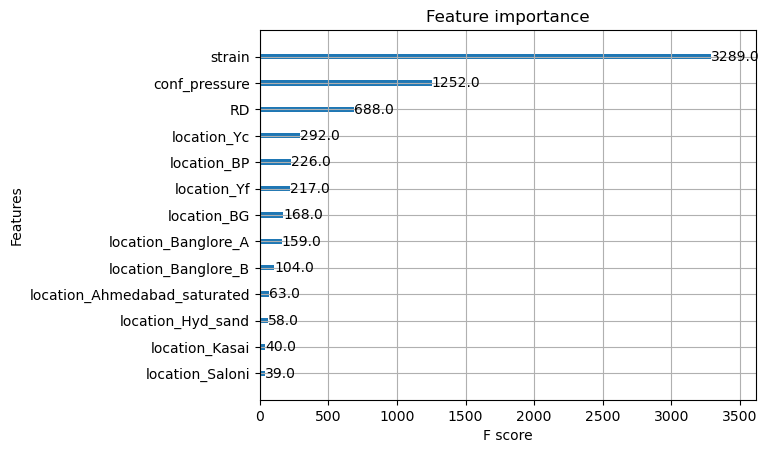

In [98]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# can access the feature importances as follows:
feature_importances = best_xgb.feature_importances_

#feature importances for each feature
for feature, importance in zip(x.columns, feature_importances):
    print(f"{feature}: {importance}")

plot_importance(best_xgb)
plt.show()

In [99]:
# predictions on the test data
y_pred = best_xgb.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean absolute Error (MAE): 0.4475376873433789
Mean Squared Error (MSE): 1.2150297708989257


In [100]:
x_test

,strain,RD,conf_pressure,location_Ahmedabad_saturated,location_BG,location_BP,location_Banglore_A,location_Banglore_B,location_Hyd_sand,location_Kasai,location_Saloni,location_Yc,location_Yf
778,0.018930,-0.458377,-0.470763,0,0,0,0,0,0,0,0,1,0
798,0.002150,-0.458377,1.486983,0,0,0,0,0,0,0,0,1,0
390,0.047621,-0.169354,-0.960200,0,0,1,0,0,0,0,0,0,0
428,0.057686,-0.169354,-0.470763,0,0,1,0,0,0,0,0,0,0
673,0.036997,0.119669,-0.881890,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.500000,-0.169354,-0.470763,0,1,0,0,0,0,0,0,0,0
420,0.023868,-0.169354,-0.470763,0,0,1,0,0,0,0,0,0,0
405,0.000424,-0.169354,-0.470763,0,0,1,0,0,0,0,0,0,0
731,0.038050,-1.325445,0.508110,0,0,0,0,0,0,0,0,1,0


In [101]:
y_test.iloc[0:10]

778     4.437600
798     1.061500
390     4.312300
428     3.905900
673     2.378840
1283    2.532520
427     3.820100
413     1.417900
1034    5.400200
1265    4.808943
Name: damping, dtype: float64

In [102]:
y_pred[0:10]

array([3.687461 , 1.0258356, 4.166778 , 3.9309144, 2.550462 , 3.5372226,
       3.5904624, 1.6226581, 4.356395 , 4.291668 ], dtype=float32)